In [1]:
library(pacman)
pacman::p_load(dplyr, GGally, ggplot2, ggthemes, ggvis, httr,
               lubridate, plotly, rio, rmarkdown, shiny, stringr, tidyr)
library(datasets)

In [2]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [3]:
cars <- mtcars[, c(1:4, 6:7, 9:11)]
head(cars)

,mpg,cyl,disp,hp,wt,qsec,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,2.620,16.46,1,4,4
Mazda RX4 Wag,21.0,6,160,110,2.875,17.02,1,4,4
Datsun 710,22.8,4,108,93,2.320,18.61,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.215,19.44,0,3,1
Hornet Sportabout,18.7,8,360,175,3.440,17.02,0,3,2
Valiant,18.1,6,225,105,3.460,20.22,0,3,1


In [4]:
pc <- prcomp(cars, center = TRUE, scale = TRUE)

In [6]:
pc <- prcomp(~ mpg + cyl + disp + hp + wt + qsec + am + gear + carb,
            data = mtcars, center = TRUE, scale = TRUE)

In [7]:
summary(pc)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.3391 1.5299 0.71836 0.46491 0.38903 0.35099 0.31714
Proportion of Variance 0.6079 0.2601 0.05734 0.02402 0.01682 0.01369 0.01118
Cumulative Proportion  0.6079 0.8680 0.92537 0.94939 0.96620 0.97989 0.99107
                           PC8    PC9
Standard deviation     0.24070 0.1499
Proportion of Variance 0.00644 0.0025
Cumulative Proportion  0.99750 1.0000

In [8]:
head(pc)

$sdev
[1] 2.3391410 1.5299383 0.7183646 0.4649052 0.3890348 0.3509911 0.3171373
[8] 0.2406989 0.1498962

$rotation
            PC1         PC2         PC3        PC4         PC5          PC6
mpg  -0.4023287  0.02205294 -0.17272803 -0.1366169  0.31654561 -0.718609897
cyl   0.4068870  0.03589482 -0.27747610  0.1410976  0.02066646 -0.214224005
disp  0.4046964 -0.06479590 -0.17669890 -0.5089434  0.21525777  0.010052074
hp    0.3699702  0.26518848 -0.01046827 -0.1273173  0.42166543 -0.254229405
wt    0.3850686 -0.15955242  0.33740464 -0.4469327 -0.21141143  0.002897706
qsec -0.2168575 -0.48343885  0.54815205 -0.2545226  0.05466817 -0.226660704
am   -0.2594512  0.46039449 -0.19492256 -0.5354196 -0.55331460 -0.087616182
gear -0.2195660  0.50608232  0.34579810 -0.1799814  0.50533262  0.393990378
carb  0.2471604  0.44322600  0.53847588  0.3203064 -0.25696817 -0.398353829
            PC7        PC8         PC9
mpg   0.3633216 -0.1487806  0.13567069
cyl   0.2099893  0.7951724  0.11635839
disp  0.

In [9]:
pc

Standard deviations (1, .., p=9):
[1] 2.3391410 1.5299383 0.7183646 0.4649052 0.3890348 0.3509911 0.3171373
[8] 0.2406989 0.1498962

Rotation (n x k) = (9 x 9):
            PC1         PC2         PC3        PC4         PC5          PC6
mpg  -0.4023287  0.02205294 -0.17272803 -0.1366169  0.31654561 -0.718609897
cyl   0.4068870  0.03589482 -0.27747610  0.1410976  0.02066646 -0.214224005
disp  0.4046964 -0.06479590 -0.17669890 -0.5089434  0.21525777  0.010052074
hp    0.3699702  0.26518848 -0.01046827 -0.1273173  0.42166543 -0.254229405
wt    0.3850686 -0.15955242  0.33740464 -0.4469327 -0.21141143  0.002897706
qsec -0.2168575 -0.48343885  0.54815205 -0.2545226  0.05466817 -0.226660704
am   -0.2594512  0.46039449 -0.19492256 -0.5354196 -0.55331460 -0.087616182
gear -0.2195660  0.50608232  0.34579810 -0.1799814  0.50533262  0.393990378
carb  0.2471604  0.44322600  0.53847588  0.3203064 -0.25696817 -0.398353829
            PC7        PC8         PC9
mpg   0.3633216 -0.1487806  0.13567069
c

In [10]:
predict(pc) %>% round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Mazda RX4,-0.82,1.46,-0.21,0.32,-0.85,-0.01,0.25,0.07,-0.18
Mazda RX4 Wag,-0.79,1.26,0.05,0.12,-0.89,-0.08,0.25,0.16,-0.09
Datsun 710,-2.49,0.03,-0.32,-0.40,-0.37,0.54,-0.50,-0.03,0.11
Hornet 4 Drive,-0.29,-1.93,-0.32,-0.07,0.21,-0.05,-0.01,0.01,-0.12
Hornet Sportabout,1.56,-0.81,-1.04,0.05,0.38,-0.14,0.15,0.08,-0.15
Valiant,-0.21,-2.19,0.14,-0.07,-0.08,0.27,-0.26,0.28,0.02
Duster 360,2.73,0.29,-0.58,0.53,0.20,-0.21,-0.40,-0.36,-0.17
Merc 240D,-1.80,-1.27,1.03,0.14,0.40,0.22,0.54,-0.33,0.03
Merc 230,-1.90,-1.93,1.96,-0.26,0.61,-0.08,-0.39,0.34,-0.19
Merc 280,0.02,-0.06,1.06,0.74,0.14,0.10,0.43,0.00,0.11


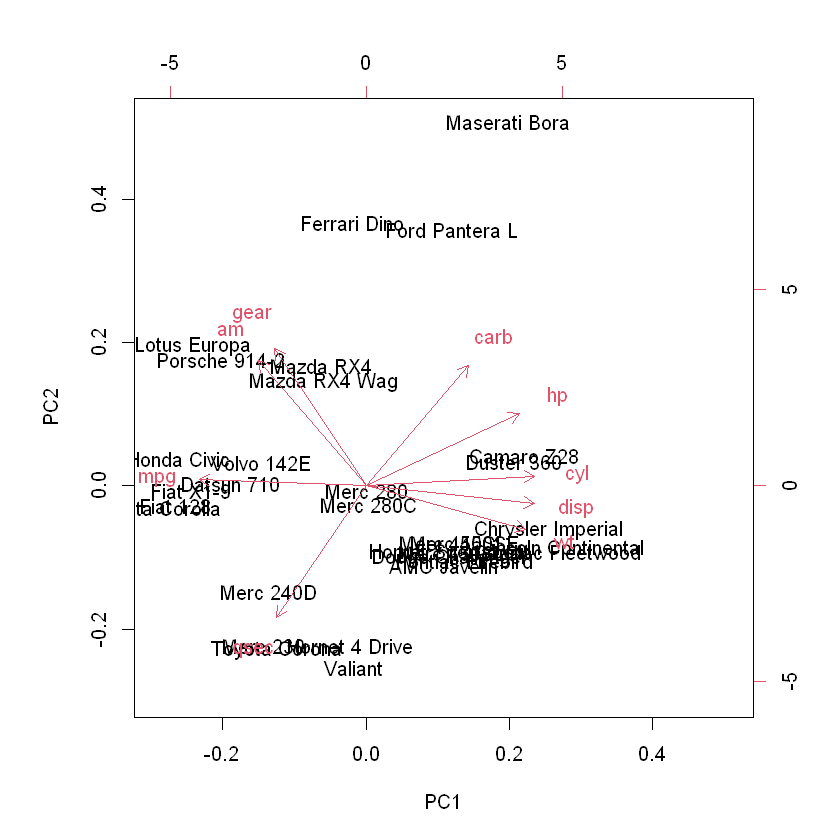

In [11]:
biplot(pc)

# REGRESSION

In [13]:
?USJudgeRatings

In [14]:
head(USJudgeRatings)

,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8
"BURNS,E.B.",6.2,8.8,8.7,8.5,7.9,8.0,8.1,8.0,8.0,8.0,8.6,8.6


In [15]:
data <- USJudgeRatings

In [16]:
x <- as.matrix(data[-12])
y <- data[, 12]

In [17]:
reg <- lm(y ~ x)

In [18]:
reg <- lm(RTEN~CONT + INTG + DMNR + DILG + CFMG + DECI + PREP + FAMI + ORAL + WRIT + PHYS,
         data = USJudgeRatings)

In [19]:
reg


Call:
lm(formula = RTEN ~ CONT + INTG + DMNR + DILG + CFMG + DECI + 
    PREP + FAMI + ORAL + WRIT + PHYS, data = USJudgeRatings)

Coefficients:
(Intercept)         CONT         INTG         DMNR         DILG         CFMG  
   -2.11943      0.01280      0.36484      0.12540      0.06669     -0.19453  
       DECI         PREP         FAMI         ORAL         WRIT         PHYS  
    0.27829     -0.00196     -0.13579      0.54782     -0.06806      0.26881  


In [20]:
summary(reg)


Call:
lm(formula = RTEN ~ CONT + INTG + DMNR + DILG + CFMG + DECI + 
    PREP + FAMI + ORAL + WRIT + PHYS, data = USJudgeRatings)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22123 -0.06155 -0.01055  0.05045  0.26079 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.11943    0.51904  -4.083 0.000290 ***
CONT         0.01280    0.02586   0.495 0.624272    
INTG         0.36484    0.12936   2.820 0.008291 ** 
DMNR         0.12540    0.08971   1.398 0.172102    
DILG         0.06669    0.14303   0.466 0.644293    
CFMG        -0.19453    0.14779  -1.316 0.197735    
DECI         0.27829    0.13826   2.013 0.052883 .  
PREP        -0.00196    0.24001  -0.008 0.993536    
FAMI        -0.13579    0.26725  -0.508 0.614972    
ORAL         0.54782    0.27725   1.976 0.057121 .  
WRIT        -0.06806    0.31485  -0.216 0.830269    
PHYS         0.26881    0.06213   4.326 0.000146 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 

In [21]:
anova(reg)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
CONT,1,0.05762378,0.05762378,4.179420,4.949035e-02
INTG,1,45.09568917,45.09568917,3270.765034,5.373063e-33
DMNR,1,1.30039151,1.30039151,94.316667,6.415162e-11
DILG,1,2.34603664,2.34603664,170.156721,3.963268e-14
CFMG,1,0.50348149,0.50348149,36.517230,1.085994e-06
DECI,1,0.21411445,0.21411445,15.529601,4.305743e-04
PREP,1,0.16416641,0.16416641,11.906897,1.635271e-03
FAMI,1,0.03860099,0.03860099,2.799708,1.043449e-01
ORAL,1,0.43928087,0.43928087,31.860795,3.384663e-06


In [22]:
coef(reg)

(Intercept)         CONT         INTG         DMNR         DILG         CFMG 
-2.119429682  0.012796377  0.364840272  0.125399138  0.066690976 -0.194527027 
        DECI         PREP         FAMI         ORAL         WRIT         PHYS 
 0.278292932 -0.001960111 -0.135790972  0.547817680 -0.068061595  0.268811919

In [23]:
confint(reg)

,2.5 %,97.5 %
(Intercept),-3.178010347,-1.06084902
CONT,-0.039955335,0.06554809
INTG,0.101011150,0.62866939
DMNR,-0.057571651,0.30836993
DILG,-0.225031708,0.35841366
CFMG,-0.495940888,0.10688683
DECI,-0.003683181,0.56026904
PREP,-0.491456059,0.48753584
FAMI,-0.680844080,0.40926214
ORAL,-0.017628284,1.11326364


In [24]:
resid(reg)

AARONSON,L.H.  ALEXANDER,J.M.  ARMENTANO,A.J.     BERDON,R.I.    BRACKEN,J.J. 
   0.1674282950    0.1599043028    0.1318188003   -0.0721243488   -0.1663513584 
     BURNS,E.B.   CALLAHAN,R.J.      COHEN,S.S.       DALY,J.J.    DANNEHY,J.F. 
   0.0344455088   -0.1228672774   -0.0359845065   -0.0414643393    0.1054849167 
      DEAN,H.H.     DEVITA,H.J.   DRISCOLL,P.J.     GRILLO,A.E.  HADDEN,W.L.JR. 
   0.0315661299    0.0279048490   -0.0066302844    0.1215116258   -0.0707169455 
    HAMILL,E.C.     HEALEY.A.H.       HULL,T.C.       LEVINE,I.   LEVISTER,R.L. 
   0.0963751277    0.0966781231    0.0587324090    0.2607914304   -0.0613783951 
    MARTIN,L.F.    MCGRATH,J.F.    MIGNONE,A.F.     MISSAL,H.M.     MULVEY,H.M. 
  -0.0105476010   -0.0926140135   -0.0964022149   -0.0479617600    0.0279999236 
     NARUK,H.J.    O'BRIEN,F.J. O'SULLIVAN,T.J.       PASKEY,L.    RUBINOW,J.E. 
  -0.0633662511   -0.0142423076   -0.1918226956    0.0253091922   -0.0179725262 
     SADEN.G.A. SATANIELLO,A.G.       SHEA,D.M.    SHEA,J.F.JR.      SIDOR,W.J. 
  -0.0144131915    0.1145104470   -0.0617147925   -0.0608608820    0.0421019215 
  SPEZIALE,J.A.     SPONZO,M.J.  STAPLETON,J.F.      TESTO,R.J. TIERNEY,W.L.JR. 
   0.1474606096    0.0421784997   -0.2212325911   -0.0375263260   -0.0007537799 
      WALL,R.A.     WRIGHT,D.B.   ZARRILLI,K.J. 
  -0.0024277845   -0.1204656347   -0.0603603048

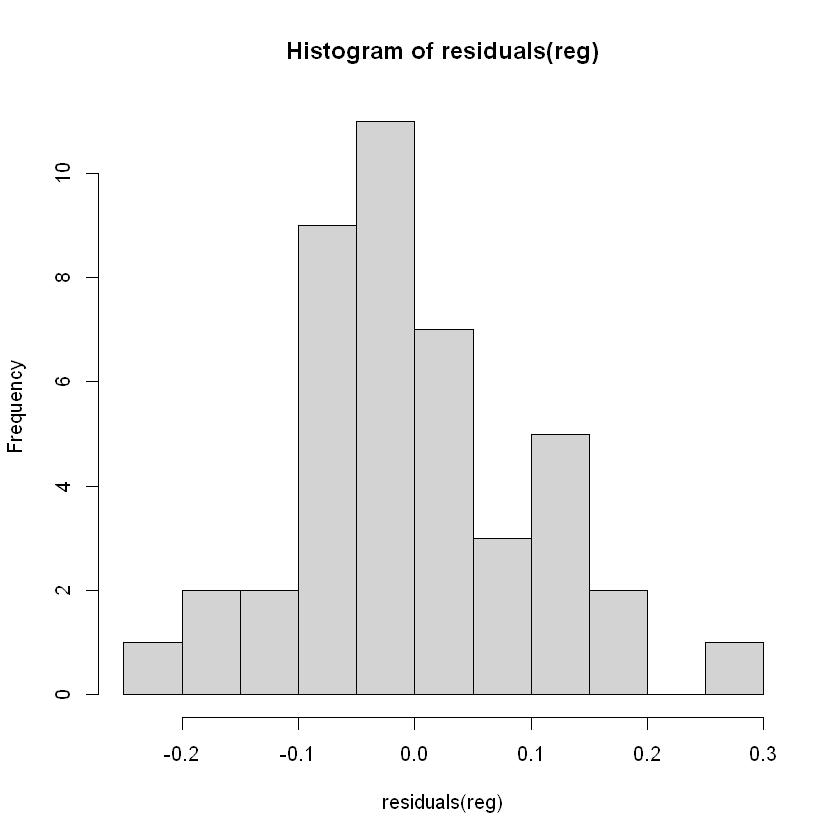

In [25]:
hist(residuals(reg))

In [26]:
p_load(lars, caret)

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/4.0:
  nie można otworzyć adresu URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/4.0/PACKAGES'"


package 'lars' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Weronika\AppData\Local\Temp\RtmpGCWRAE\downloaded_packages



lars installed



In [28]:
stepwise <- lars(x, y, type="stepwise")

In [29]:
forward <- lars(x, y, type = "forward.stagewise")

In [30]:
lar  <- lars(x, y, type = "lar")

In [31]:
lasso <- lars(x, y, type="lasso")

In [37]:
lar$R2[6]

5 
0.9908669

In [39]:
rcomp <- c(stepwise$R2[6], forward$R2[6], lar$R2[6], lasso$R2[6]) %>% round(2)

In [40]:
names(rcomp)

[1] "5" "5" "5" "5"

In [41]:
rcomp

5    5    5    5 
0.99 0.99 0.99 0.99